<a href="https://colab.research.google.com/github/AshaMariam/AshaMariam_Intern_Week_01/blob/main/AshaMariam_Internship_Week_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2

# Customer Segmentation for Marketing Strategy

## Phase 2: Week 2
###Clustering Algorithm Selection and Data Transformation

**Objectives**:

● Algorithm Selection: Decide on the clustering algorithm (e.g., K-means, hierarchical
clustering) suitable for this analysis.

● Feature Selection: Identify relevant features and attributes from the dataset for clustering.

● Data Scaling: If required, scale the data to ensure all features have equal influence in the
clustering process.

● Dimensionality Reduction: Consider dimensionality reduction techniques (e.g., PCA) if dealing
with high-dimensional data.

Data Collection

In [65]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [66]:
#Loading Data
train_data = pd.read_csv('/content/Train.csv')
test_data = pd.read_csv('/content/Test.csv')

Data Exploration

In [67]:
train_data.head(10)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
5,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,23,apr,163.0,1.0,NaN,0,unknown,1
6,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,687.0,4.0,NaN,0,unknown,1
7,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,210.0,1.0,NaN,0,unknown,0
8,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,160.0,2.0,NaN,0,unknown,0
9,id_1406,50.0,blue-collar,married,secondary,no,407.0,yes,yes,cellular,7,aug,233.0,2.0,NaN,0,unknown,0


In [68]:
train_data.tail()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0
31646,id_1723,38.0,technician,single,tertiary,no,1045.0,no,no,cellular,18,aug,183.0,10.0,NaN,0,unknown,0


In [69]:
train_data.shape

(31647, 18)

In [70]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [71]:
train_data.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [72]:
# Check unique values for each column in test_data
for column in train_data.columns:
    unique_values = train_data[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'id': ['id_43823' 'id_32289' 'id_10523' ... 'id_44679' 'id_4841' 'id_1723']
Unique values for column 'customer_age': [28. 34. 46. 41. 65. 57. 37. 29. 50. 52. 35. 18. 55. 42. 53. 58. 70. 31.
 38. 45. 33. 25. 61. 20. 54. 36. 64. 30. 32. 48. 49. 40. 27. 47. 39. 51.
 26. 56. 44. nan 60. 24. 62. 43. 21. 59. 23. 78. 71. 76. 22. 72. 73. 63.
 69. 88. 67. 81. 79. 77. 75. 74. 86. 68. 19. 66. 95. 80. 82. 83. 84. 97.
 87. 91. 85. 89. 93. 92.]
Unique values for column 'job_type': ['management' 'blue-collar' 'technician' 'services' 'retired'
 'entrepreneur' 'admin.' 'student' 'housemaid' 'self-employed' 'unknown'
 'unemployed']
Unique values for column 'marital': ['single' 'married' 'divorced' nan]
Unique values for column 'education': ['tertiary' 'secondary' 'primary' 'unknown']
Unique values for column 'default': ['no' 'yes']
Unique values for column 'balance': [ 285.  934.  656. ... 1764. 7032. -511.]
Unique values for column 'housing_loan': ['yes' 'no']
Unique values for

In [73]:
train_data.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [74]:
test_data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


In [75]:
test_data.shape

(13564, 17)

In [76]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

In [77]:
test_data.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome'],
      dtype='object')

In [78]:
test_data.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign
count,13294.000000,13383.000000,13564.000000,13442.000000,13519.000000,2441.000000,13564.000000
mean,40.450429,1341.405514,15.778089,261.171031,2.730971,223.582958,0.553966
std,10.747881,2839.670990,8.321562,261.195560,2.941338,116.196526,1.762402
min,18.000000,-6849.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,32.000000,70.500000,8.000000,102.000000,1.000000,131.000000,0.000000
50%,39.000000,447.000000,16.000000,182.000000,2.000000,194.000000,0.000000
75%,48.000000,1466.000000,21.000000,325.000000,3.000000,323.000000,0.000000
max,94.000000,71187.000000,31.000000,3863.000000,50.000000,842.000000,38.000000


In [79]:
# Check unique values for each column in test_data
for column in test_data.columns:
    unique_values = test_data[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'id': ['id_17231' 'id_34508' 'id_44504' ... 'id_43066' 'id_18375' 'id_12898']
Unique values for column 'customer_age': [55. 24. 46. 56. 62. 35. 27. 29. 50. 37. 52. 51. 30. 32. 54. 39. 33. 38.
 71. 36. 79. 31. nan 53. 22. 66. 49. 34. 57. 58. 41. 43. 40. 28. 44. 73.
 48. 42. 59. 47. 26. 74. 23. 45. 18. 25. 64. 61. 78. 81. 60. 63. 68. 21.
 80. 65. 20. 72. 69. 67. 19. 70. 75. 85. 77. 82. 76. 84. 83. 94. 87. 91.
 90. 86.]
Unique values for column 'job_type': ['retired' 'blue-collar' 'technician' 'housemaid' 'self-employed'
 'management' 'admin.' 'unemployed' 'entrepreneur' 'services' 'student'
 'unknown']
Unique values for column 'marital': ['married' 'single' 'divorced' nan]
Unique values for column 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Unique values for column 'default': ['no' 'yes']
Unique values for column 'balance': [7136.  179.  143. ... 7101. 3322. 6943.]
Unique values for column 'housing_loan': ['no' 'yes']
Unique values for column 'perso


We have similar features in the test dataset as the training dataset except for the '**term_deposit_subscribed**'. We will predict the term_deposit_subscribed using the model built using the train data. Given below is the description for each variable.



1. 'id': A unique identifier for each customer.

2. 'customer_age': Age of the customer.

3. 'job_type': The type of job the customer is engaged in.

4. 'marital': Marital status of the customer.

5. 'education': Education level of the customer.

6. 'default': Indicates whether the customer has credit in default.

7. 'balance': Balance in the customer's account.

8. 'housing_loan': Indicates whether the customer has a housing loan.

9. 'personal_loan': Indicates whether the customer has a personal loan.

10. 'communication_type': The type of communication used.

11. 'day_of_month': Day of the month when the customer was contacted.

12. 'month': Month when the customer was contacted.

13. 'last_contact_duration': Duration of the last contact in seconds.

14. 'num_contacts_in_campaign': Number of contacts made during this campaign for this customer.

15. 'days_since_prev_campaign_contact': Number of days since the previous campaign contact.

16. 'num_contacts_prev_campaign': Number of contacts performed before this campaign for this customer.

17. 'prev_campaign_outcome': Outcome of the previous marketing campaign.

18. 'term_deposit_subscribed': Indicates whether the customer subscribed to the term deposit.



Handling Missing Values

In [80]:
train_data.isnull().sum()


id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [81]:

# Numerical features: mean imputation
numerical_features = ['customer_age', 'balance', 'last_contact_duration',
                      'num_contacts_in_campaign', 'days_since_prev_campaign_contact']
for feature in numerical_features:
    train_data[feature].fillna(train_data[feature].mean(), inplace=True)

# Categorical features: mode imputation
categorical_features = ['marital', 'personal_loan']
for feature in categorical_features:
    train_data[feature].fillna(train_data[feature].mode()[0], inplace=True)


In [82]:
train_data.isnull().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64

In [83]:
test_data.isnull().sum()

id                                      0
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

In [84]:
# Numerical features: mean imputation
numerical_features = ['customer_age', 'balance', 'last_contact_duration',
                      'num_contacts_in_campaign', 'days_since_prev_campaign_contact']
for feature in numerical_features:
    test_data[feature].fillna(test_data[feature].mean(), inplace=True)

# Categorical features: mode imputation
categorical_features = ['marital', 'personal_loan']
for feature in categorical_features:
    test_data[feature].fillna(test_data[feature].mode()[0], inplace=True)

In [85]:
test_data.isnull().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
dtype: int64

Outlier Detection and Treatment

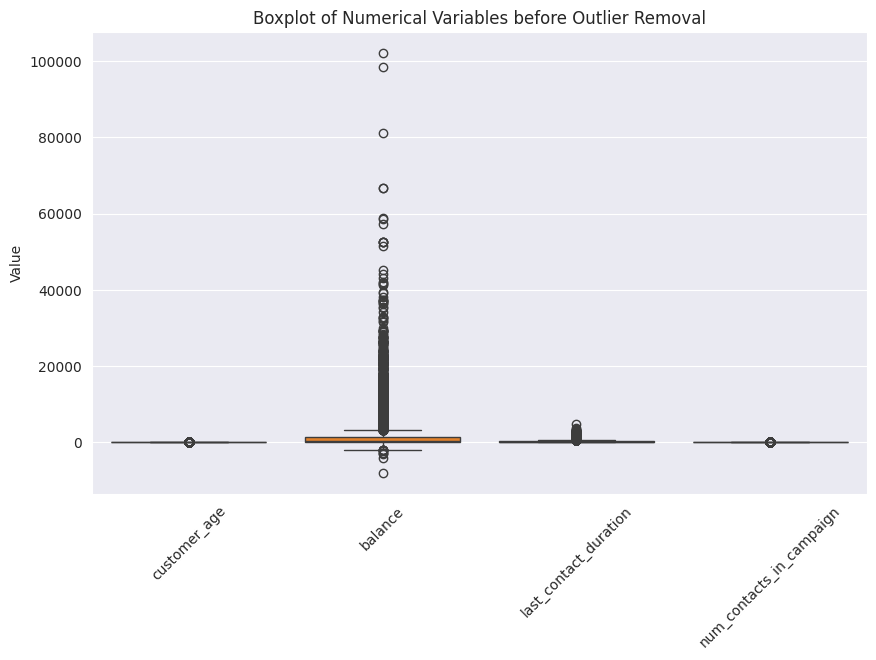

In [86]:
#train_data
# Boxplot for numerical variables before outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']], orient='v')
plt.title('Boxplot of Numerical Variables before Outlier Removal')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [87]:
#train_data
# Outlier Detection and Treatment
# Example: Removing outliers using z-score method
from scipy import stats
train_data = train_data[(np.abs(stats.zscore(train_data.select_dtypes(include='number'))) < 3).all(axis=1)]



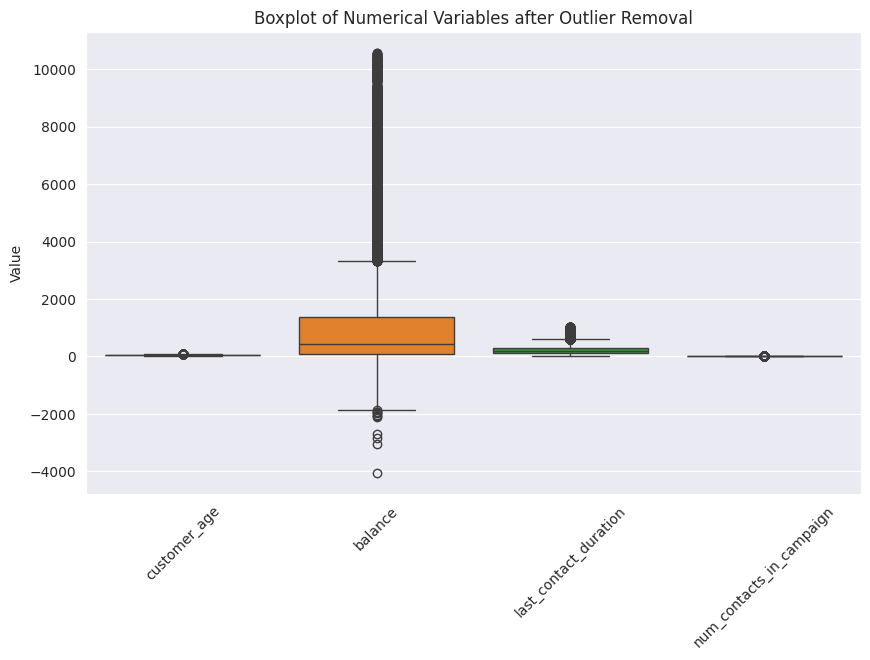

In [88]:
# Boxplot for numerical variables after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']], orient='v')
plt.title('Boxplot of Numerical Variables after Outlier Removal')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

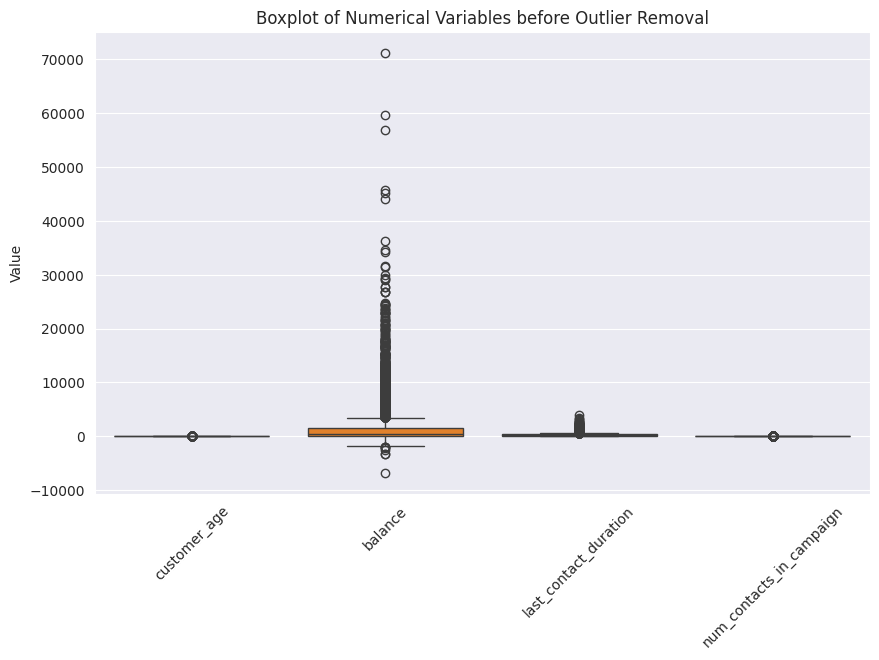

In [89]:
#test_data
# Boxplot for numerical variables before outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=test_data[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']], orient='v')
plt.title('Boxplot of Numerical Variables before Outlier Removal')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [90]:
#test_data
# Outlier Detection and Treatment
# Example: Removing outliers using z-score method
from scipy import stats
test_data = test_data[(np.abs(stats.zscore(test_data.select_dtypes(include='number'))) < 3).all(axis=1)]



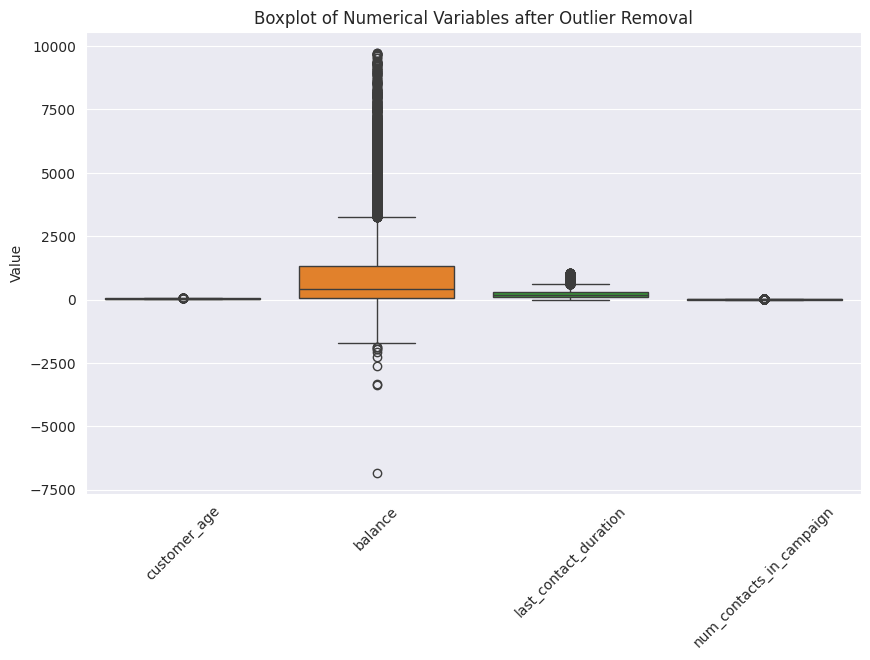

In [91]:
# Boxplot for numerical variables after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=test_data[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']], orient='v')
plt.title('Boxplot of Numerical Variables after Outlier Removal')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Data Visualization

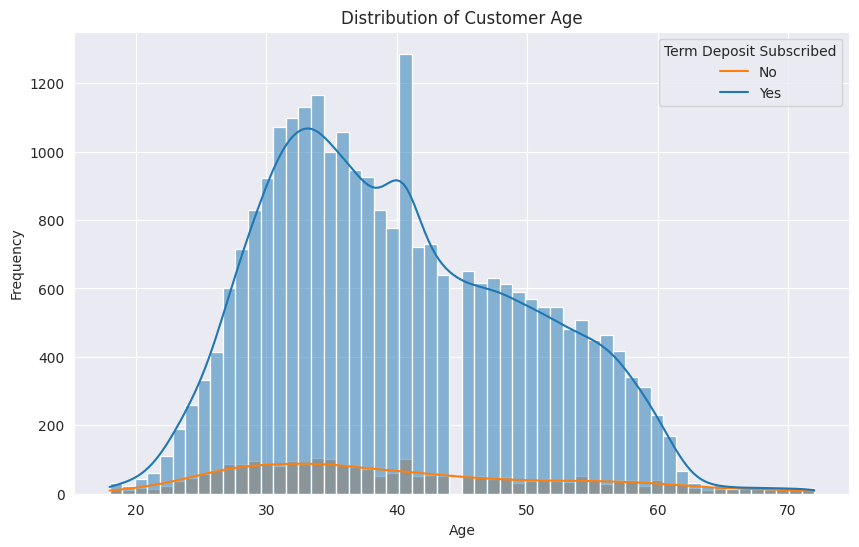

In [92]:
#train_data
# Histogram of Customer Age vs Term deposit subscribed
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='customer_age', hue='term_deposit_subscribed', kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

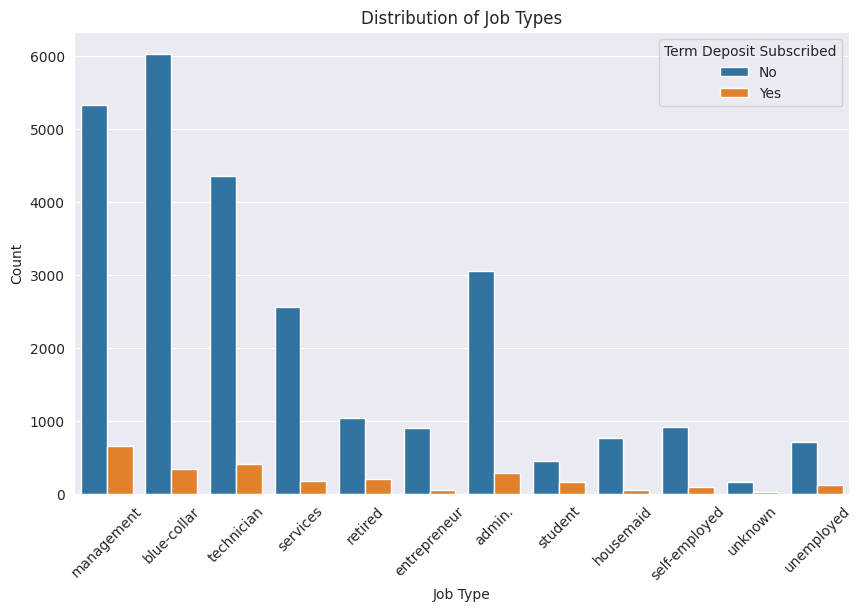

In [93]:
# Bar Plot of Job Types
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='job_type', hue='term_deposit_subscribed')
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

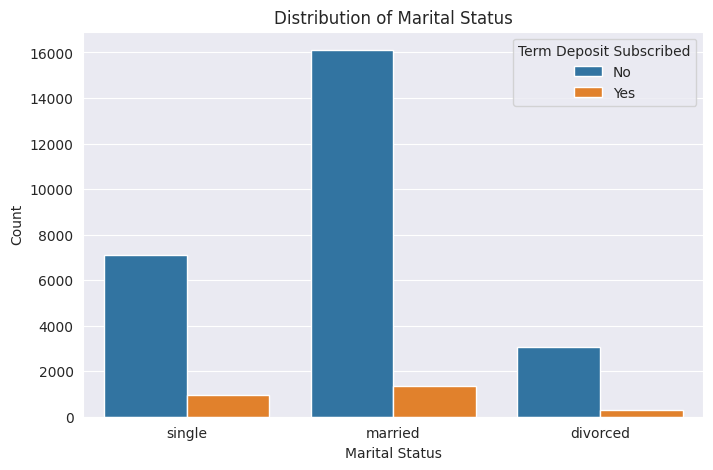

In [94]:
# Bar Plot of Marital Status
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='marital', hue='term_deposit_subscribed')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

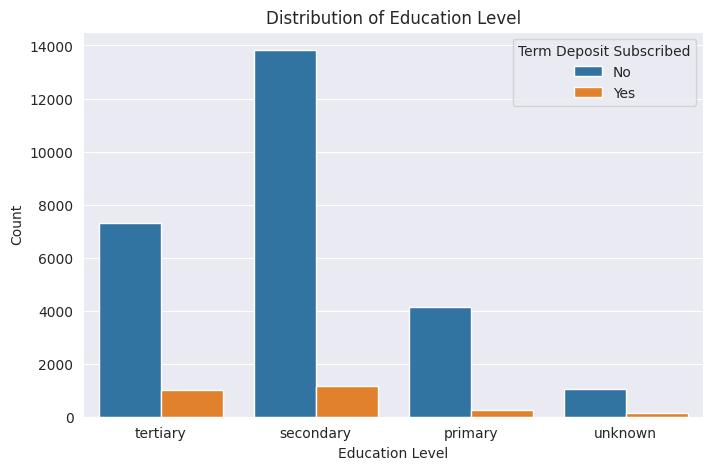

In [95]:
# Bar Plot of Education Level
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='education', hue='term_deposit_subscribed')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

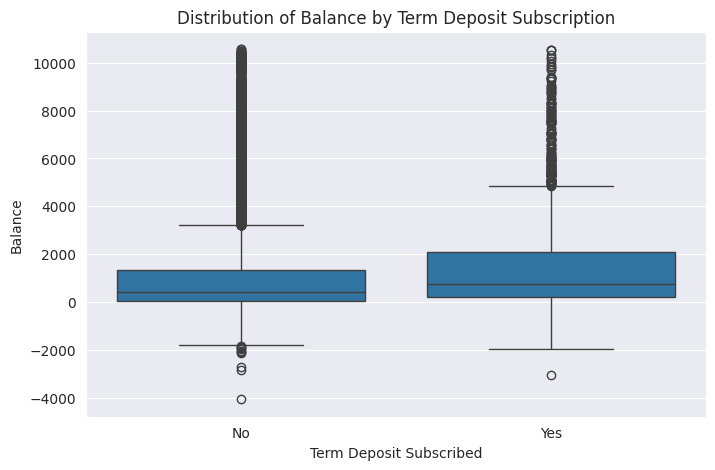

In [96]:
# Box Plot of Balance
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_data, x='term_deposit_subscribed', y='balance')
plt.title('Distribution of Balance by Term Deposit Subscription')
plt.xlabel('Term Deposit Subscribed')
plt.ylabel('Balance')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

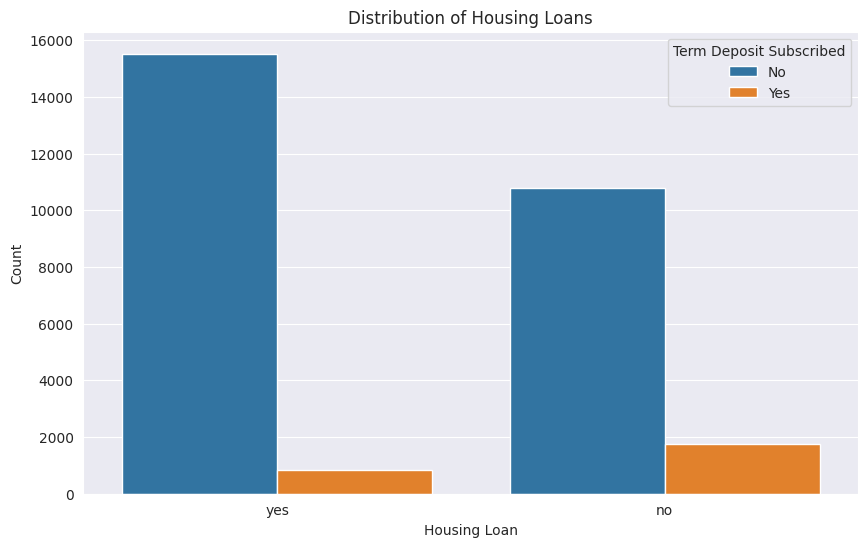

In [97]:
# Bar Plot of Housing Loans and Personal Loans
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='housing_loan', hue='term_deposit_subscribed')
plt.title('Distribution of Housing Loans')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

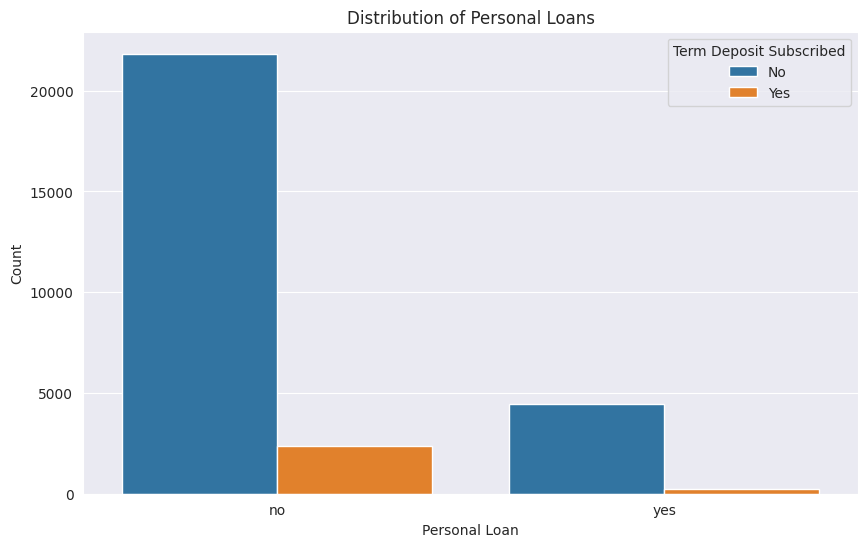

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='personal_loan', hue='term_deposit_subscribed')
plt.title('Distribution of Personal Loans')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

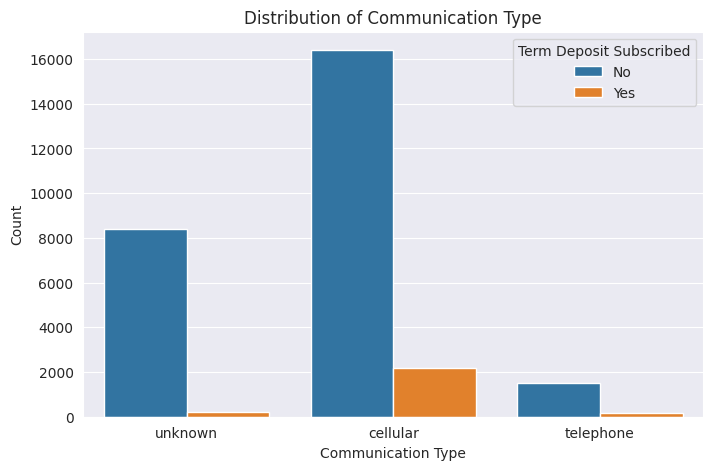

In [99]:
# Bar Plot of Communication Type
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='communication_type', hue='term_deposit_subscribed')
plt.title('Distribution of Communication Type')
plt.xlabel('Communication Type')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

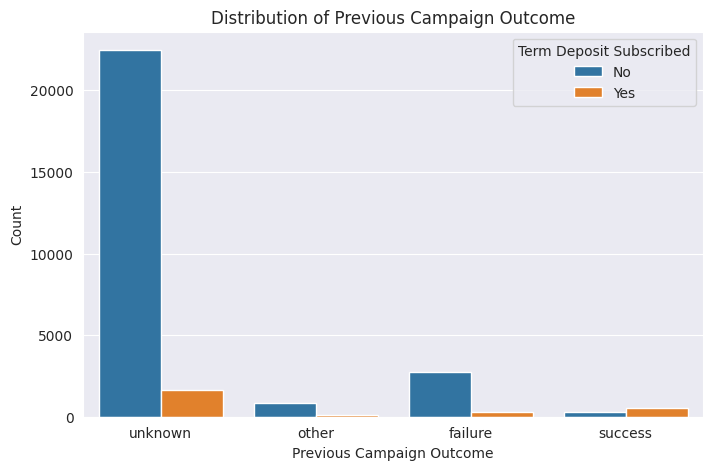

In [100]:
# Bar Plot of Previous Campaign Outcome
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='prev_campaign_outcome', hue='term_deposit_subscribed')
plt.title('Distribution of Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])
plt.show()

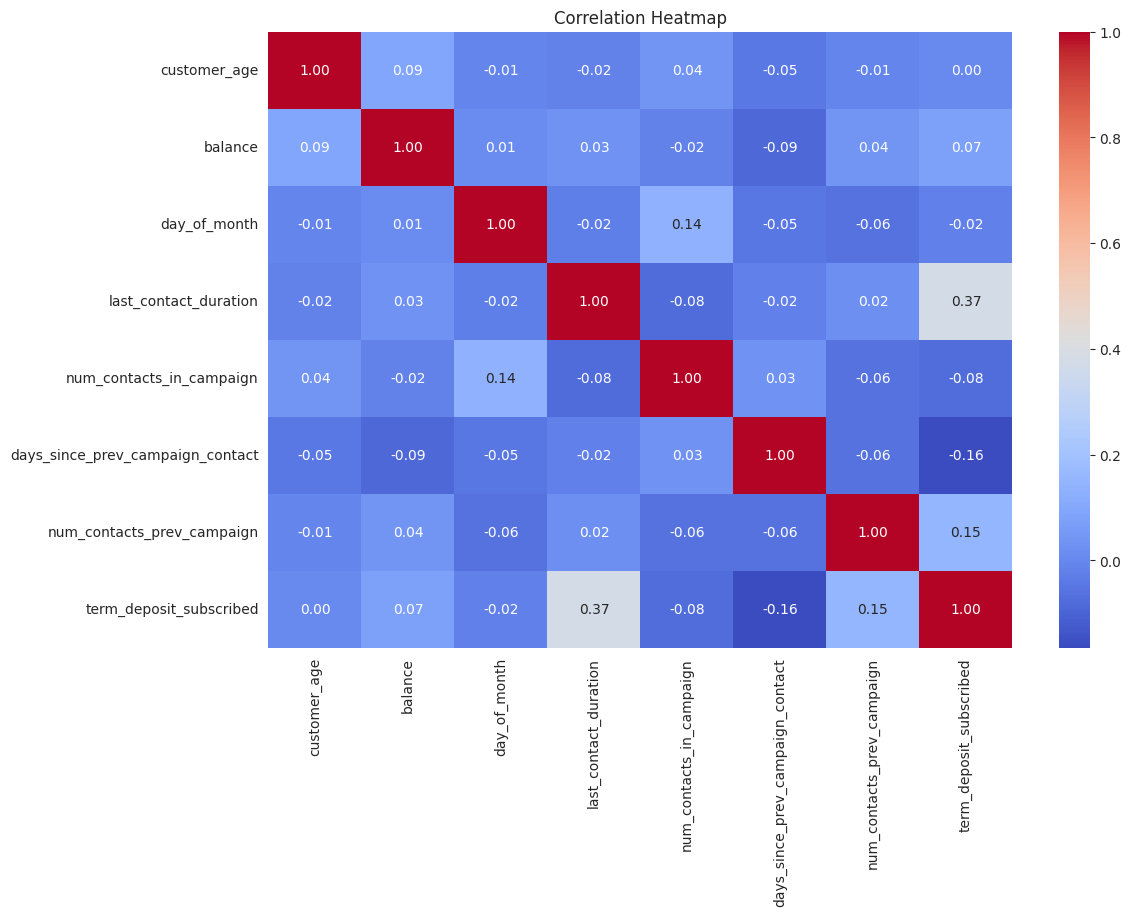

In [101]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

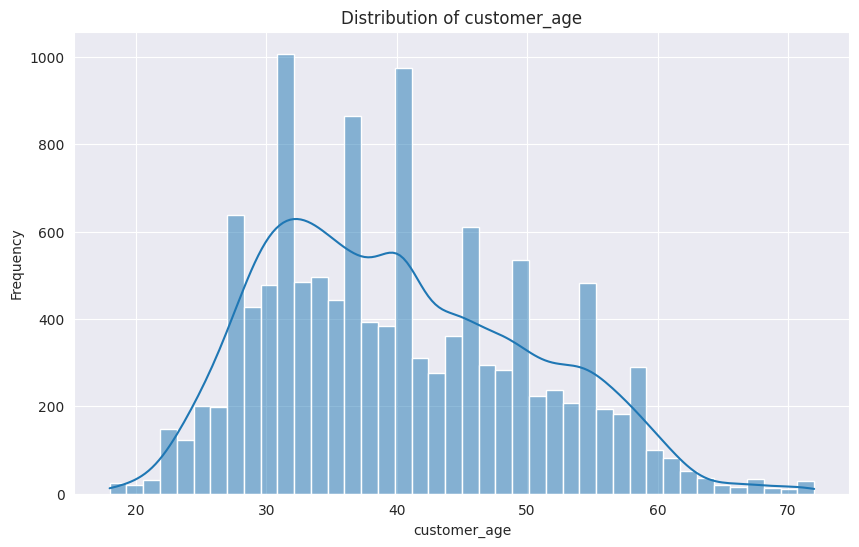

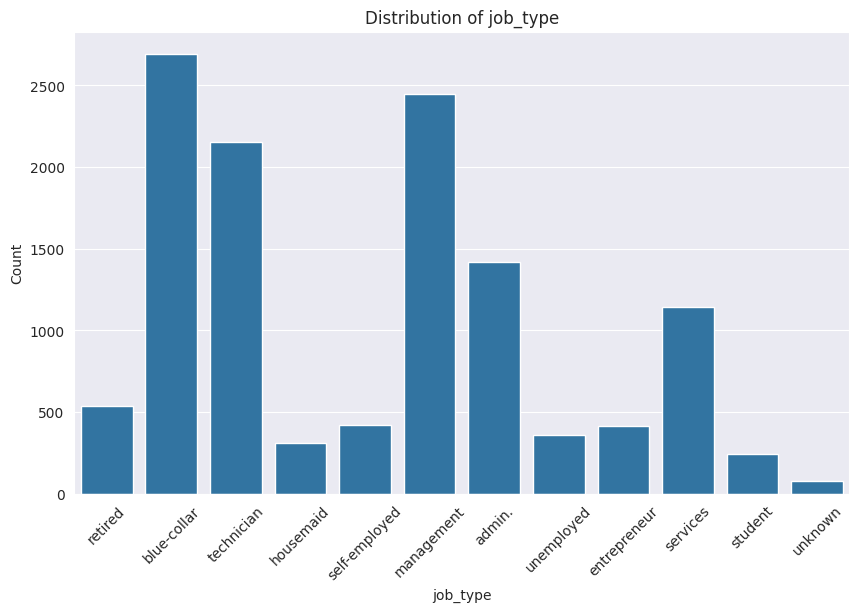

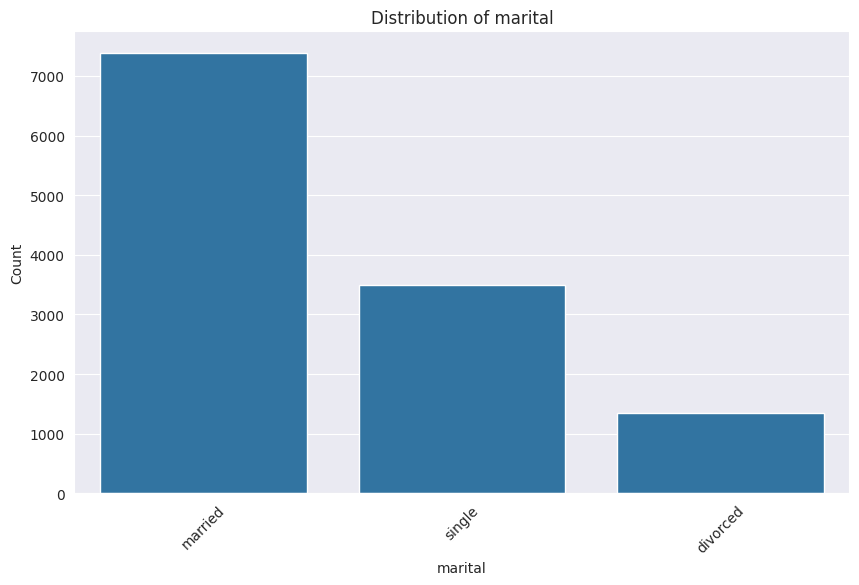

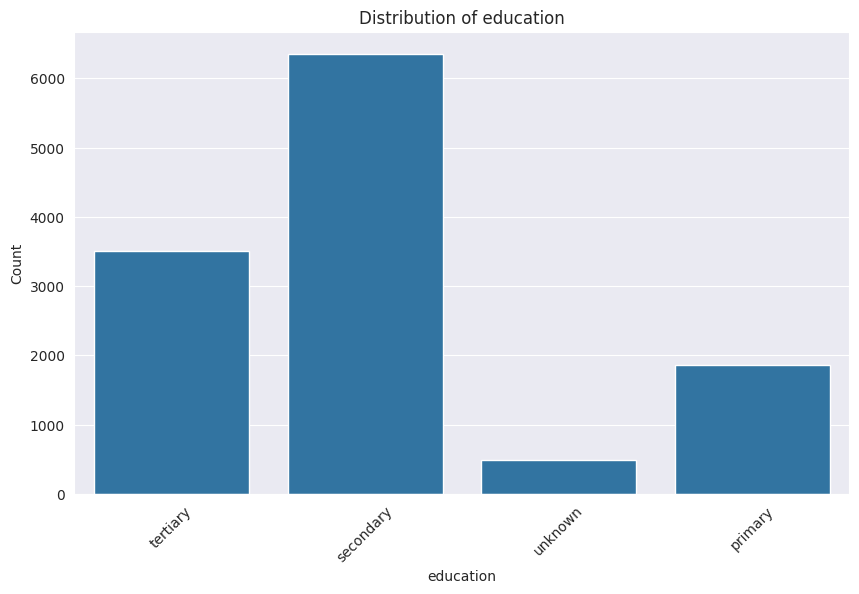

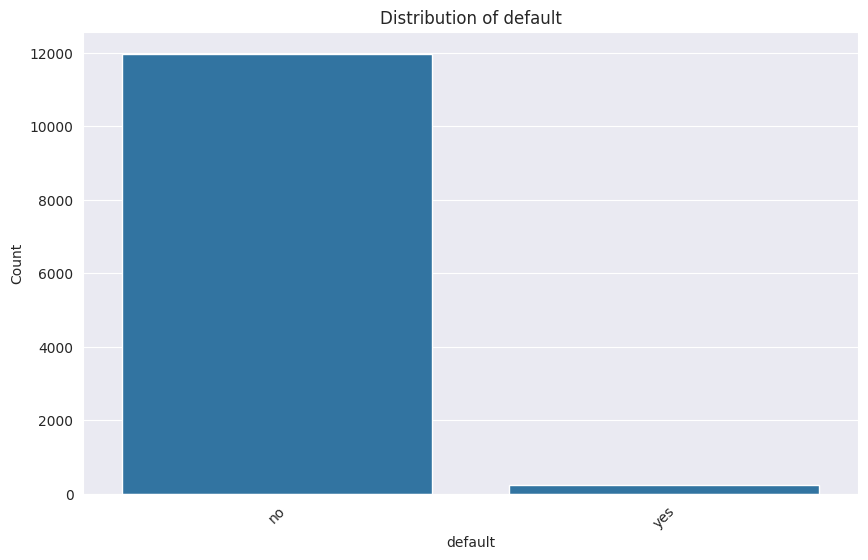

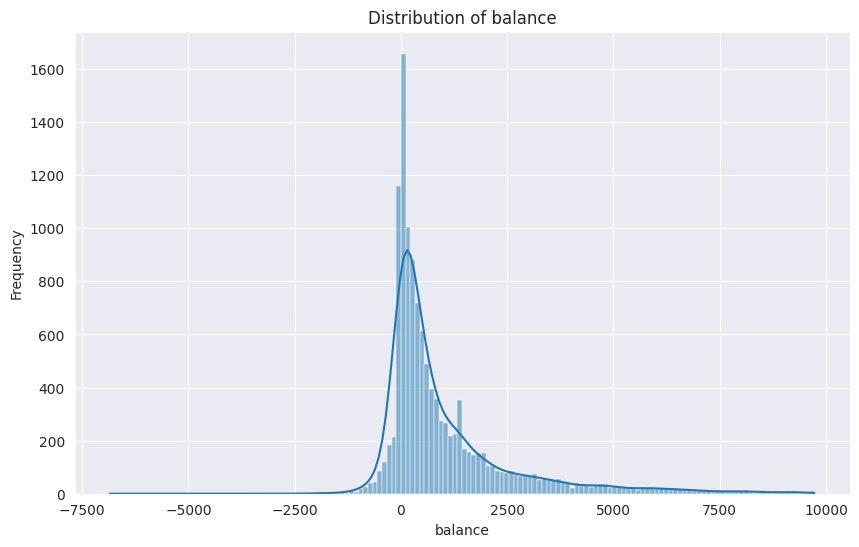

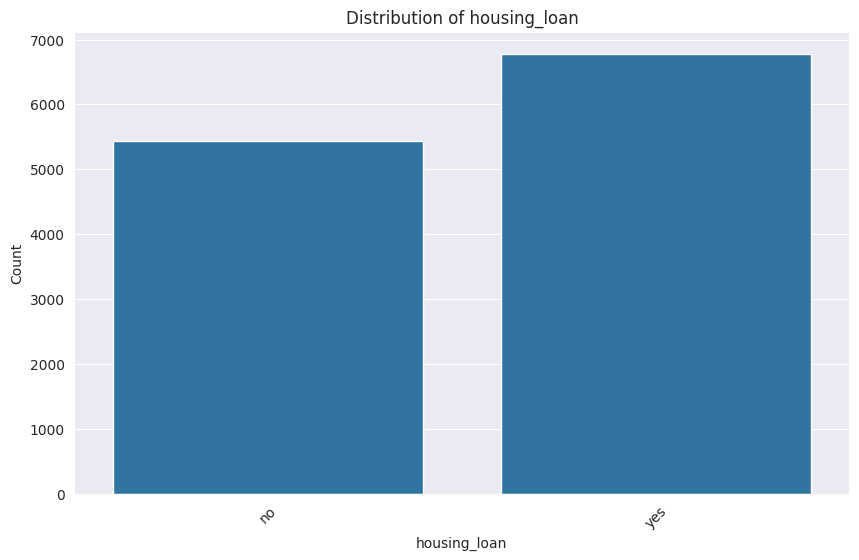

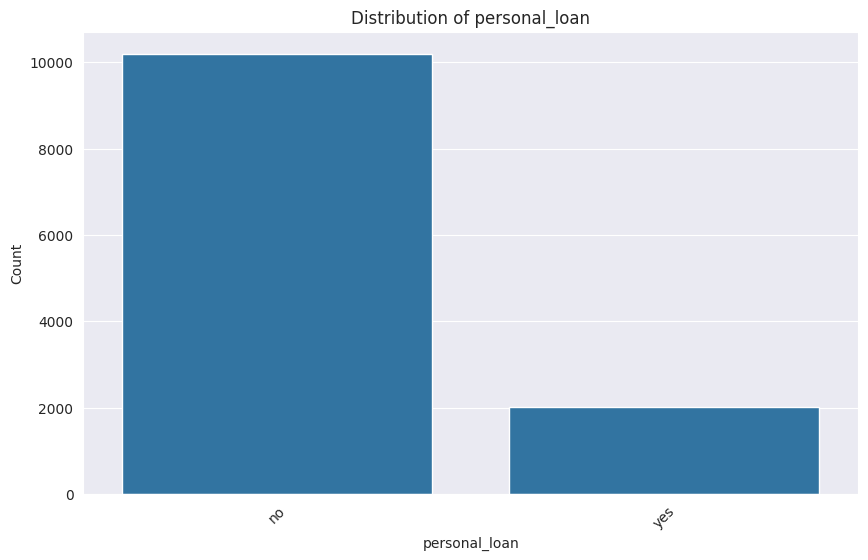

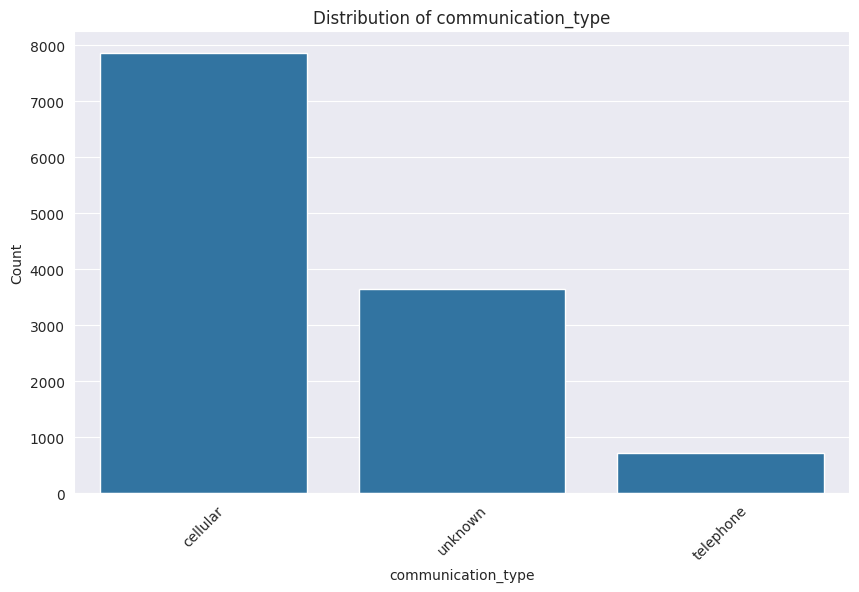

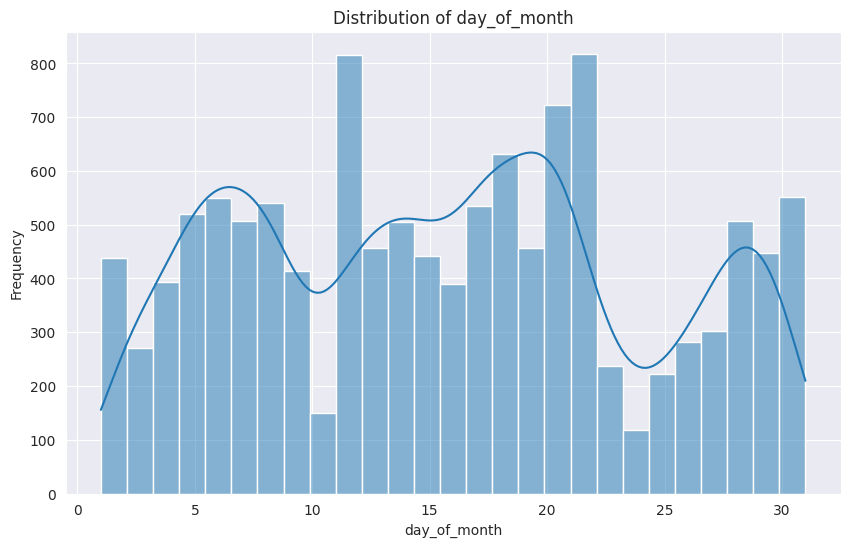

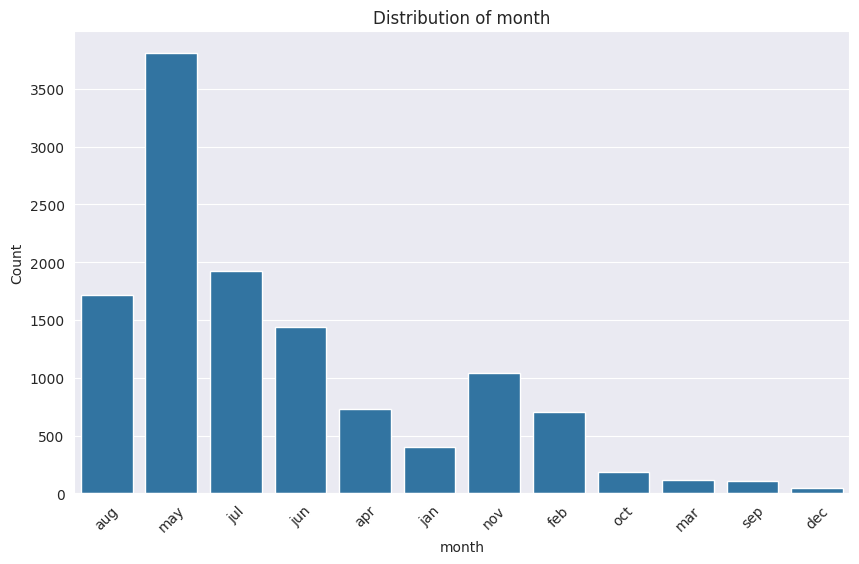

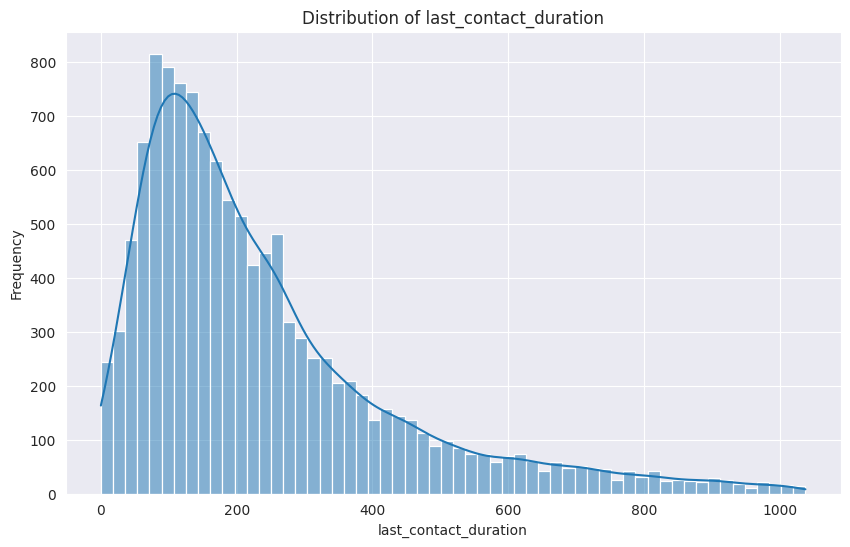

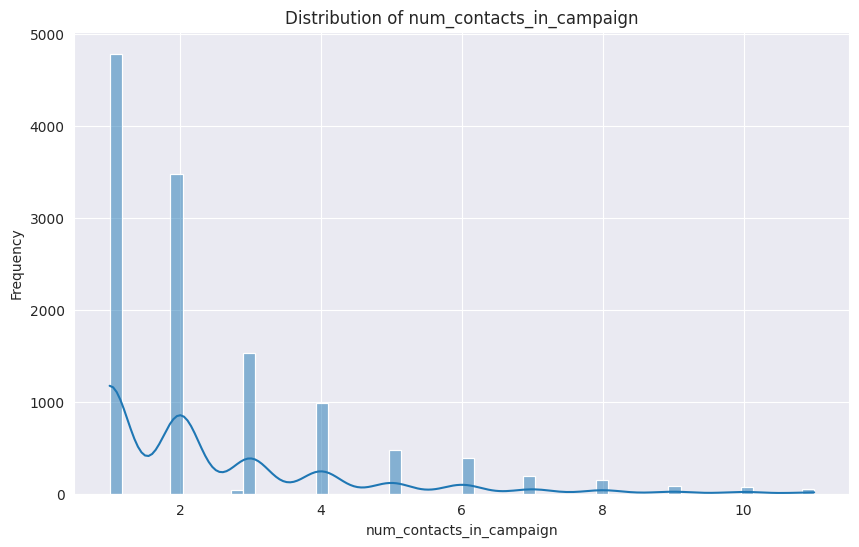

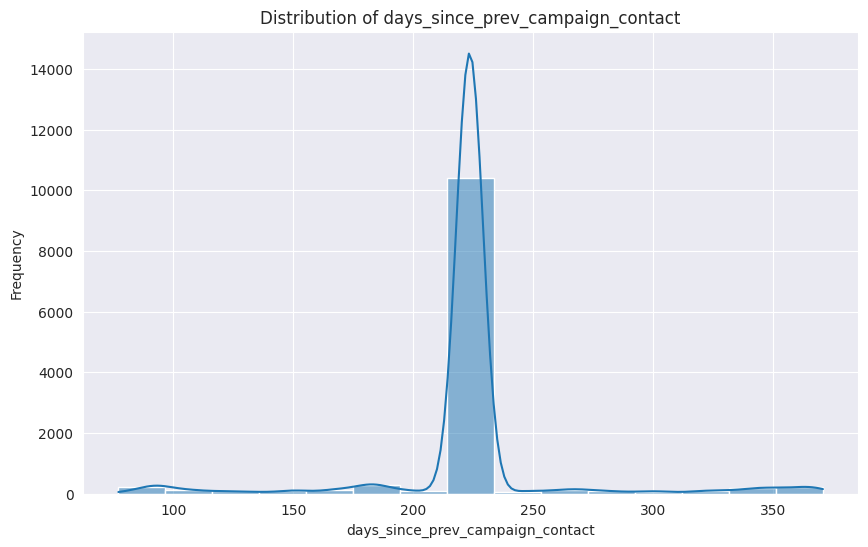

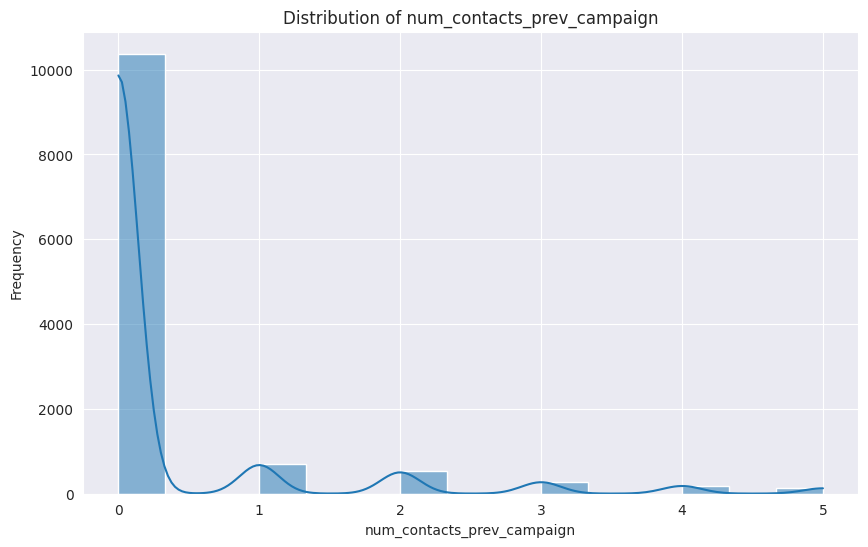

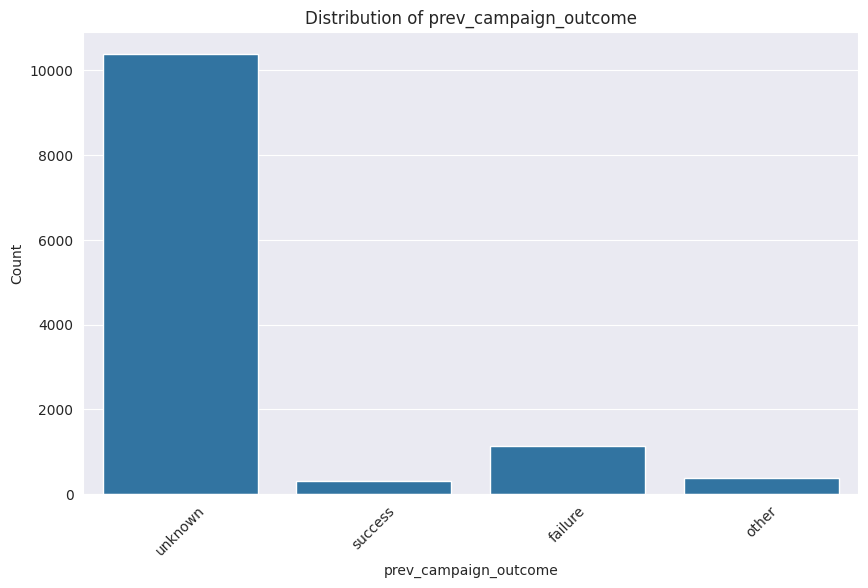

In [102]:
#test_data
sns.set_style("darkgrid")

columns_to_visualize = ['customer_age', 'job_type', 'marital', 'education', 'default',
                        'balance', 'housing_loan', 'personal_loan', 'communication_type',
                        'day_of_month', 'month', 'last_contact_duration',
                        'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
                        'num_contacts_prev_campaign', 'prev_campaign_outcome']

# Loop through each column and create visualizations
for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))

    # Numeric column: histogram
    if test_data[column].dtype in ['int64', 'float64']:
        sns.histplot(test_data[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    # Categorical column: count plot
    else:
        sns.countplot(data=test_data, x=column)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    plt.show()


Feature Selection

In [103]:
# Assuming all features are relevant, selected all columns except the target variable
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
X = train_data[numeric_columns].drop(columns=['term_deposit_subscribed'])

Data Scaling and Dimensionality Reduction

In [104]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [105]:
# Data Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction (Optional)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [106]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28882 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                28882 non-null  object 
 1   customer_age                      28882 non-null  float64
 2   job_type                          28882 non-null  object 
 3   marital                           28882 non-null  object 
 4   education                         28882 non-null  object 
 5   default                           28882 non-null  object 
 6   balance                           28882 non-null  float64
 7   housing_loan                      28882 non-null  object 
 8   personal_loan                     28882 non-null  object 
 9   communication_type                28882 non-null  object 
 10  day_of_month                      28882 non-null  int64  
 11  month                             28882 non-null  object 
 12  last

In [107]:
train_data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,224.995186,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.000000,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,224.995186,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,224.995186,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,224.995186,0,unknown,0


Algorithm Selection

In [108]:
# K-means clustering
from sklearn.cluster import KMeans
K = 5
# Fit a K-means model
kmeans = KMeans(n_clusters=K, random_state=0)
train_data["Cluster"] = kmeans.fit_predict(X)

In [109]:
X.head(10)

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign
0,28.0,285.0,26,303.0,4.0,224.995186,0
1,34.0,934.0,18,143.0,2.0,132.000000,1
2,46.0,656.0,5,101.0,4.0,224.995186,0
3,34.0,2.0,20,127.0,3.0,224.995186,0
4,41.0,1352.0,13,49.0,2.0,224.995186,0
5,65.0,2880.0,23,163.0,1.0,224.995186,0
6,57.0,495.0,18,687.0,4.0,224.995186,0
7,37.0,650.0,26,210.0,1.0,224.995186,0
8,29.0,265.0,19,160.0,2.0,224.995186,0
9,50.0,407.0,7,233.0,2.0,224.995186,0


In [110]:
# inertia
inertia = kmeans.inertia_

print("Inertia:", inertia)

Inertia: 5784047887.784056


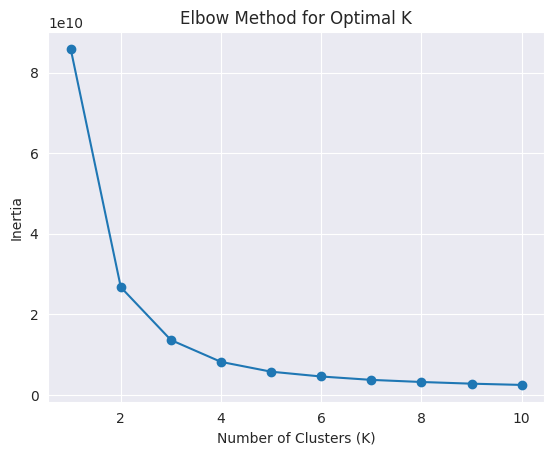

In [111]:
K_range = range(1, 11)
inertia_values = []

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

# Elbow method
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [112]:
# Silhouette score of K - Means
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, train_data["Cluster"])
print("K - Means Silhouette Score:", silhouette_avg)

K - Means Silhouette Score: 0.5487752062082829


In [113]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, ..., 1, 0, 1])

In [114]:
X_np=X.values

In [115]:
# Silhouette score for Agglomerative clustering
silhouette_agg = silhouette_score(X, y_hc)
print("Agglomerative clustering Silhouette Score:", silhouette_agg)


Agglomerative clustering Silhouette Score: 0.6350563830091178


In [116]:
# Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
gmm_labels = gmm.predict(X)

In [117]:
# Silhouette score for GMM
gmm_silhouette_score = silhouette_score(X, gmm_labels)
print("GMM Silhouette Score:", gmm_silhouette_score)

GMM Silhouette Score: 0.206628335111708


**Silhouette Scores**

Agglomerative clustering Silhouette Score: 0.6350563830091178

K - Means Silhouette Score: 0.5487752062082829

GMM Silhouette Score: 0.206628335111708

**Conclusion**

Based on the silhouette scores, Agglomerative Clustering appears to be the most suitable algorithm for clustering the dataset. K-Means also performs well, but it is slightly lower silhouette score. GMM demonstrates comparatively weaker performance in clustering the dataset, as indicated by its lower silhouette score.